In [1]:
from web3 import Web3
import json
import requests
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math

In [2]:
import pandas as pd
import os
os.chdir('C:\\Users\\Shyam\\Documents\\GitHub\\beacondigest\\notebooks\\2021\\even more eip1559 paper\\random_forest_regression')

In [3]:
df1 = pd.read_csv('fatales-clean.csv',low_memory = False)
df1 = df1[df1['toaddress'] == '0x0bb3e1c80c0ffde985fb0ec6392aa18a1d2de40e']
df1.head(5)

,detecttime,hash,status,gas,gasprice,curblocknumber,timepending,blockspending,replace,fromaddress,toaddress,nonce,type,basefeepergas,maxpriorityfeepergas,maxfeepergas
3934,2021-08-31T23:54:25.889Z,0xc5834768f2887fb78c124ab0460f6100c69b1b4d855c...,pending,46183,NaN,13136399,NaN,NaN,NaN,0xb35d79b2e0352847e8b86b29dc901d57f29a3a60,0x0bb3e1c80c0ffde985fb0ec6392aa18a1d2de40e,247,2,134237600512,3.149416e+09,1.910821e+11
4315,2021-08-31T23:53:55.382Z,0x8015a1fcf6829af7d34ff6f234bcf6c9e236cfc0c6fd...,pending,46183,NaN,13136398,NaN,NaN,NaN,0xb99428a91f720bd6490fc62c52c4efb646e66c73,0x0bb3e1c80c0ffde985fb0ec6392aa18a1d2de40e,155,2,152959410436,3.246820e+09,2.026828e+11
4618,2021-08-31T23:53:29.042Z,0x0b43712193e9f786bd33c27b468c50e45c7a54475b67...,pending,46183,NaN,13136395,NaN,NaN,NaN,0xc688c84066b74ea5999131cce1ccc30597dc6f9c,0x0bb3e1c80c0ffde985fb0ec6392aa18a1d2de40e,77,2,142454290913,3.246820e+09,2.026828e+11
6797,2021-08-31T23:50:24.053Z,0xf5795b85c981105aaf6327f9b7af37574d2e94594b50...,pending,46183,1.583619e+11,13136381,NaN,NaN,NaN,0xb1a18dcaacd48cc5940f84baa3ad8fead1507892,0x0bb3e1c80c0ffde985fb0ec6392aa18a1d2de40e,227,0,155445950331,NaN,NaN
11064,2021-08-31T23:44:37.527Z,0x369931d8b6be5035e048ca1c77a0b1de0987d2c54b6c...,pending,46183,2.070000e+11,13136351,NaN,NaN,NaN,0xf78580b326ac68bf1838540ab1f06c3c8613036f,0x0bb3e1c80c0ffde985fb0ec6392aa18a1d2de40e,31,0,197330666087,NaN,NaN


In [4]:
df1_counts = df1['curblocknumber'].value_counts().rename_axis('unique_values').reset_index(name='counts')
df1_counts.head(5)

,unique_values,counts
0,13131000,445
1,13130995,374
2,13131001,207
3,13131016,152
4,13130997,149


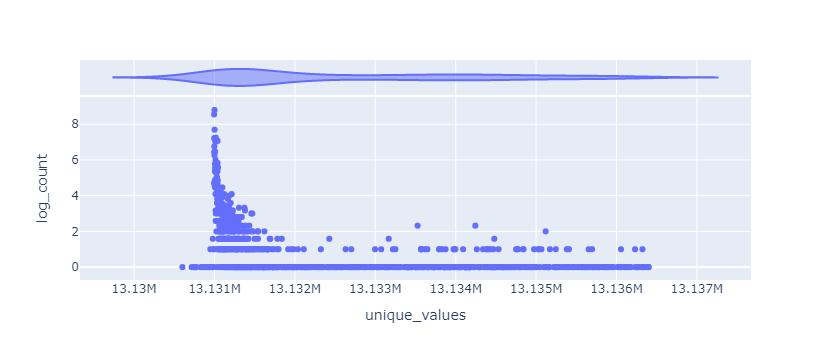

In [5]:
df1_counts['log_count'] = np.log2(df1_counts['counts'])
fig = px.scatter(df1_counts, x="unique_values", y="log_count", marginal_x="violin")
fig.show()

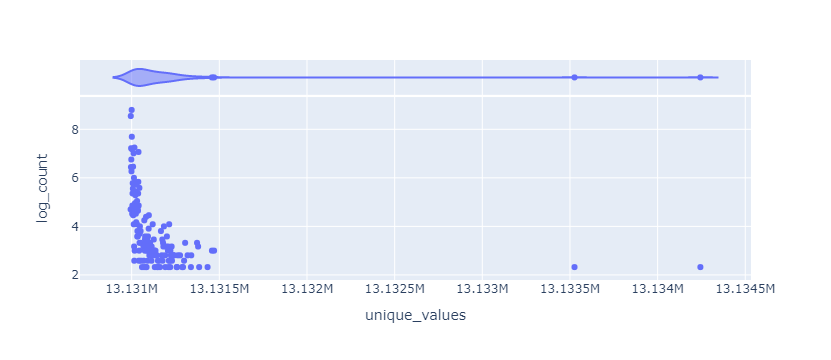

In [10]:
df1_counts1 = df1_counts[df1_counts['log_count'] > 2]
fig = px.scatter(df1_counts1, x="unique_values", y="log_count", marginal_x="violin")
fig.show()